## Exploratory analysis 

Exploratory analysis is an ensemble of technics to organize,  summarize and visualize the **data**

 

###  import dataset and packages

import iris dataset from seaborn
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x5 dataframe

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load iris data

df=sns.load_dataset("iris")

#head of dataframe

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


let's print the shape of our data frame which is 150 observations and 5 variables. 

from the method info(), we can verify that is no missing data and consistency of type of each variable with its content

Finally, with the help of value_count(), we can see that we have 3 species, each category has 50 rows of observations


In [3]:
print("shape: ", df.shape)
df.info()
df.species.value_counts()

shape:  (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

### plot histogram

A first exercise that need to be done for our numerical variables , is to have an idea about representation of the distribution of numerical data.    

let's plot the histogram of sepal length (cm)

the matplotlib has 10 bins by default , in order to optimize the number of bins , we can calculate the the square root of the length of data points and round up/down

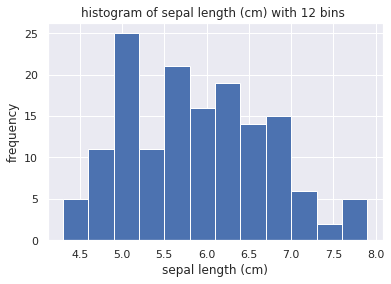

In [4]:
sns.set() # to specify the default seaborn style 
bins = round(np.sqrt(len(df["sepal_length"])))
plt.hist(df["sepal_length"], bins=bins)  
plt.xlabel("sepal length (cm)")
plt.ylabel("frequency")
plt.title(f"histogram of sepal length (cm) with {bins} bins ")
plt.show()

**PairGrid** also allows you to draw a grid of subplots using the same plot type to visualize data for each variable. it's also possible to plot the histogram in the diagonal and the scatterplot off-diagonal.



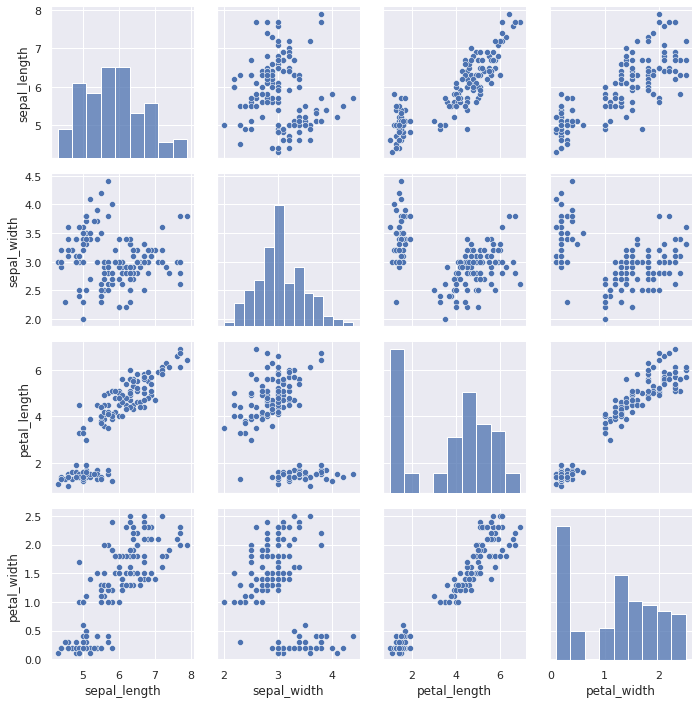

In [5]:
g= sns.PairGrid(df)
#g.map(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

### bee swarm and box plot

bee swarm plot is a one-dimensional scatter plot,  it displays individual measurements as points and ensures that plotted points are close to each other and do not overlap.

From the bee swarm and box plot, we can already see that there is a significant difference between the sepal length distribution of the 3 categories.



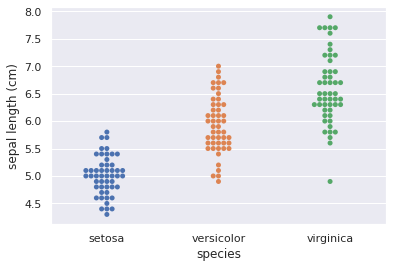

In [6]:
sns.swarmplot(x="species", y="sepal_length", data=df)
plt.xlabel("species")
plt.ylabel("sepal length (cm)")
plt.show()

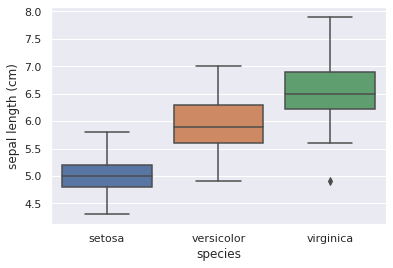

In [7]:
sns.boxplot(x="species", y="sepal_length", data=df)
plt.xlabel("species")
plt.ylabel("sepal length (cm)")
plt.show()

### empirical cumulative distribution function

from the ecdf , we can see that :

*  80% of setosa has sepal length less than 5.4cm
*  80% of versicolor has sepal length less than 6.4cm
*  80% of virginica has sepal length less than 7.2cm



In [8]:
def ecdf(column):
  a = np.sort(column)
  b = np.arange(1, len(column)+1)/len(column)
  return a, b

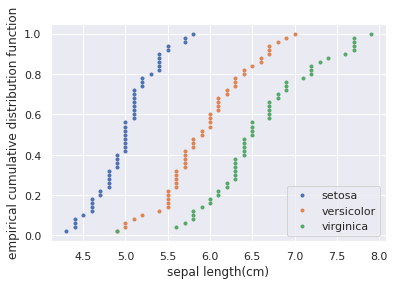

In [9]:
x_setosa, y_setosa = ecdf(df[df["species"] == "setosa"]["sepal_length"])
x_versicolor, y_versicolor = ecdf(df[df["species"] == "versicolor"]["sepal_length"])
x_virginica, y_virginica = ecdf(df[df["species"] == "virginica"]["sepal_length"])

plt.plot(x_setosa, y_setosa, marker = ".", linestyle ="none")
plt.plot(x_versicolor, y_versicolor, marker = ".", linestyle ="none")
plt.plot(x_virginica, y_virginica, marker = ".", linestyle ="none")

plt.legend(("setosa","versicolor","virginica"), loc="lower right")
plt.xlabel("sepal length(cm)")
plt.ylabel("empirical cumulative distribution function")
plt.show()

We can verify the above values by computing the 80% percentile of sepal length per specie or display the describe() method per specie

In [10]:
print("80% of setosa", np.percentile(df[df["species"] == "setosa"]["sepal_length"],80))
print("80% of versicolor", np.percentile(df[df["species"] == "versicolor"]["sepal_length"],80))
print("80% of virginica", np.percentile(df[df["species"] == "virginica"]["sepal_length"],80))

80% of setosa 5.32
80% of versicolor 6.4
80% of virginica 7.2


In [11]:
for n in df.species.unique():
    print(f"Describe method for specie: {n}\n")
    print(df[df["species"] == n].describe())
    print("========================================================")
    

Describe method for specie: setosa

       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000
Describe method for specie: versicolor

       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     

**ANOVA Test (F test)**

Let's test the groups of species if there is a difference between them 

An ANOVA test is a way to find out if  results are statistically significant. they help us to figure out if we need to reject the null hypothesis (no difference between groups) or accept the alternate hypothesis(difference between groups).

the p value for significance is less than 5% ,So we can reject the null hypotesis!

In [12]:
#ANOVA test (F test)

from scipy.stats import stats
F, p = stats.f_oneway(df[df["species"] == "setosa"]["sepal_length"],df[df["species"] == "versicolor"]["sepal_length"],df[df["species"] == "virginica"]["sepal_length"])
print("p-value for significance is: ", p)

p-value for significance is:  1.6696691907693826e-31
